In [4]:
import os

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

In [5]:
datadir = "/media/cjw/Data/cyto/mmFromTifs3/"
# datadir = "/home/cjw/disk2cjw/Data/cyto/mmFromTifs"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/mmFromTifs3/Fish6_Untreated.mm', '/media/cjw/Data/cyto/mmFromTifs3/Fish6_ICE.mm', '/media/cjw/Data/cyto/mmFromTifs3/Fish6_CCB.mm']
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
30000


dict_keys(['Fish6_Untreated.mm', 'Fish6_ICE.mm', 'Fish6_CCB.mm'])

In [6]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000


Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 1) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 16, 16, 64) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 4, 4, 256) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 64), dtype=float32)
isize:  4 32
dh0 (?, 32, 32, 1)
[<tf.Tensor 'dropout_3/mul:0' shape=(?, 4096) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 256) dtype=float32>, <tf.Tensor 'dropout_4/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 16, 16, 64) dtype=float32>] Tensor("Minimum:0", shape=(?, 32, 32, 1), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32) Tensor("Mean_2:0", shape=(), dtype=float32) Tensor("add_5:0", shape=(), dtype=float32)
30000 234 128
Epoch:  0 Iteration:  0 Loss:  263.613 4.41558 0.337773


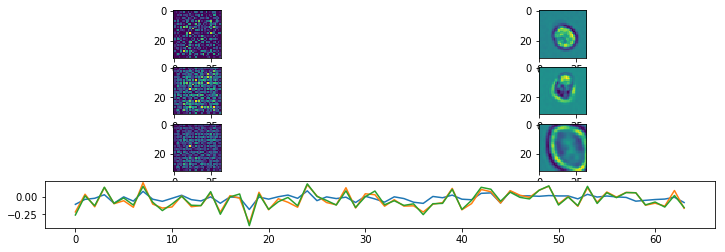

Epoch:  1 Iteration:  0 Loss:  9.14042 0.698894 0.0107773


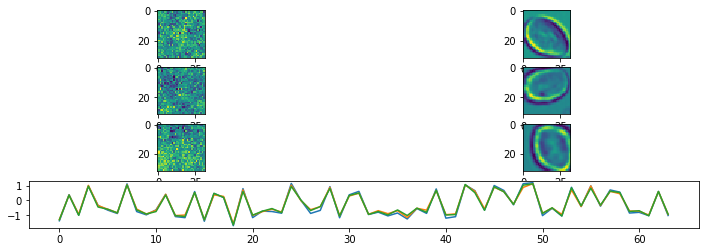

Epoch:  2 Iteration:  0 Loss:  7.3229 0.695308 0.0111391


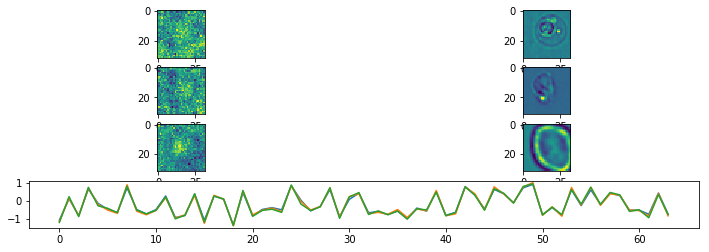

Epoch:  3 Iteration:  0 Loss:  6.50823 0.693707 0.00261134


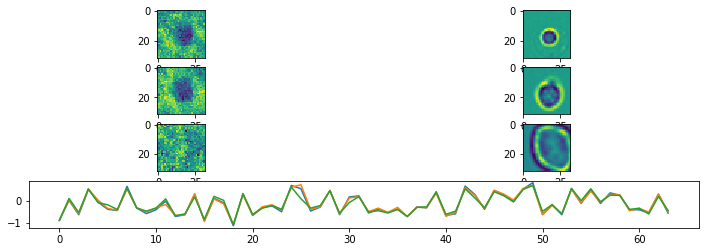

Epoch:  4 Iteration:  0 Loss:  5.35614 0.691451 0.00756803


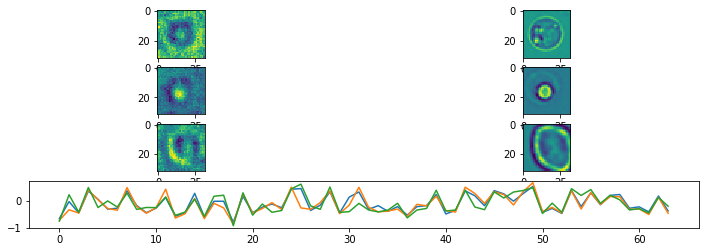

Epoch:  5 Iteration:  0 Loss:  4.2514 0.689278 0.00112769


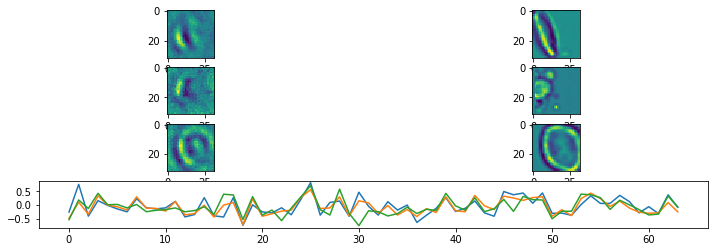

Epoch:  6 Iteration:  0 Loss:  3.75445 0.688295 0.000406563


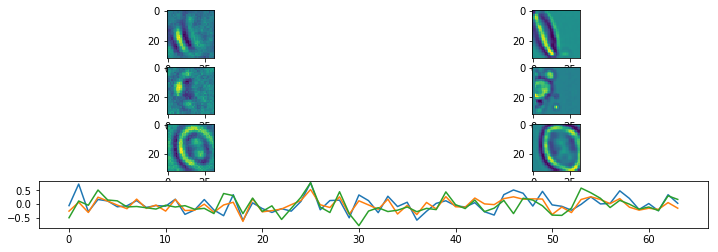

Epoch:  7 Iteration:  0 Loss:  3.39491 0.687581 0.00190923


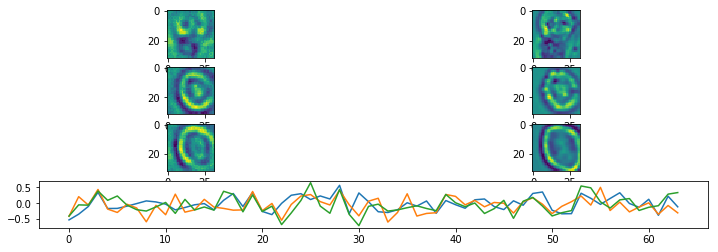

Epoch:  8 Iteration:  0 Loss:  3.22885 0.687251 0.00286722


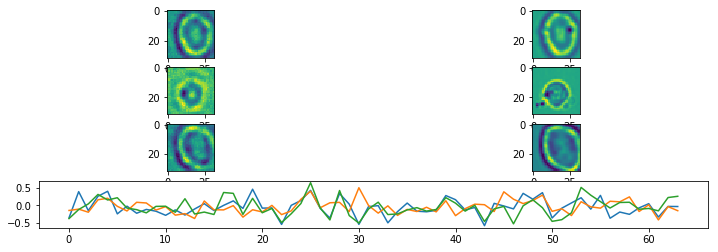

Epoch:  9 Iteration:  0 Loss:  3.0308 0.686858 0.00168982


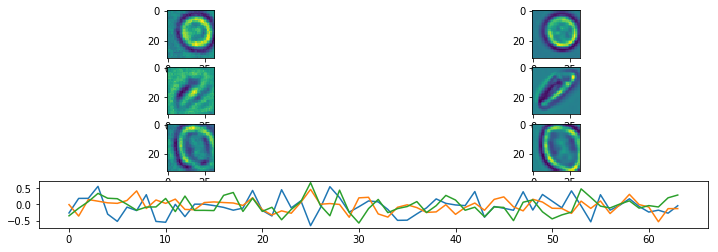

Epoch:  10 Iteration:  0 Loss:  2.92346 0.686642 0.00192681


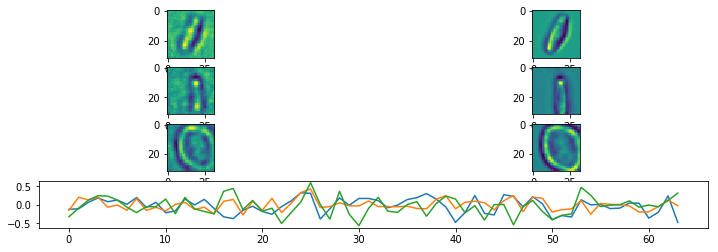

Epoch:  11 Iteration:  0 Loss:  2.81391 0.686428 0.00171012


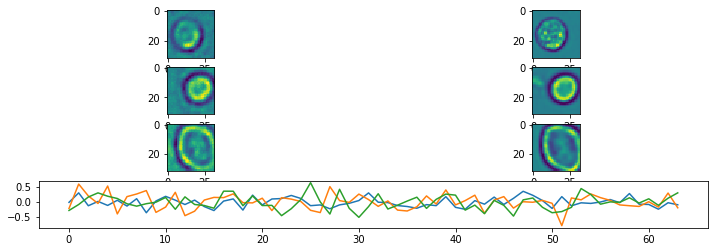

Epoch:  12 Iteration:  0 Loss:  2.74537 0.68629 0.00149149


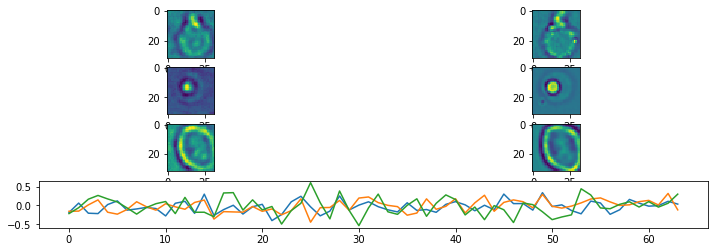

Epoch:  13 Iteration:  0 Loss:  2.68527 0.686167 0.0021286


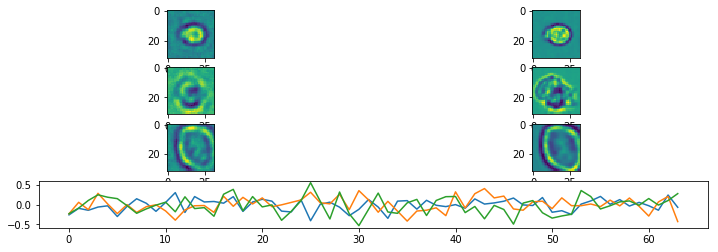

Epoch:  14 Iteration:  0 Loss:  2.63034 0.68606 0.00115085


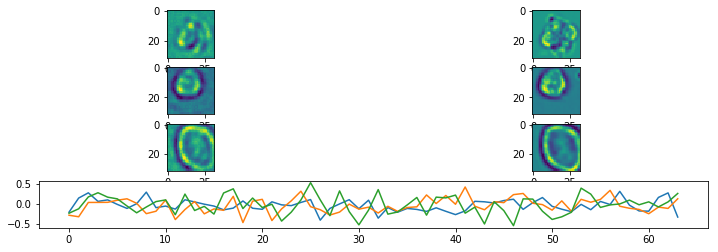

Epoch:  15 Iteration:  0 Loss:  2.58272 0.685961 0.0011996


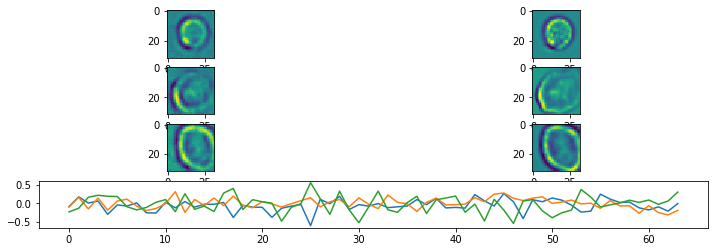

Epoch:  16 Iteration:  0 Loss:  2.67046 0.686138 0.00363415


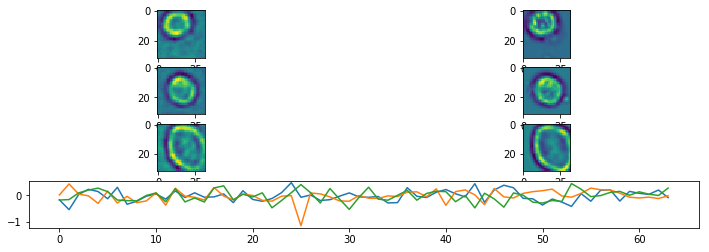

Epoch:  17 Iteration:  0 Loss:  2.52086 0.685841 0.000355244


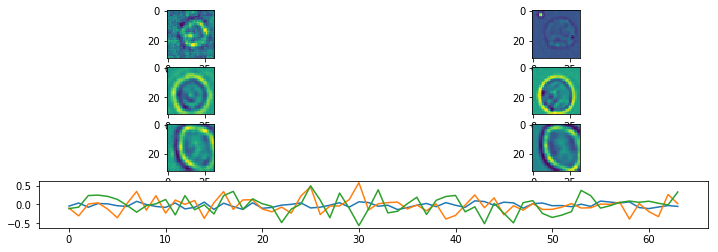

Epoch:  18 Iteration:  0 Loss:  2.47868 0.685752 0.000797987


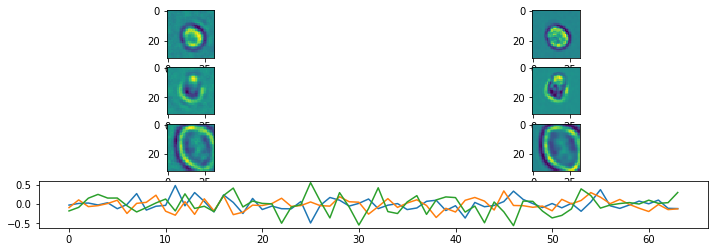

Epoch:  19 Iteration:  0 Loss:  2.46409 0.685724 0.00126463


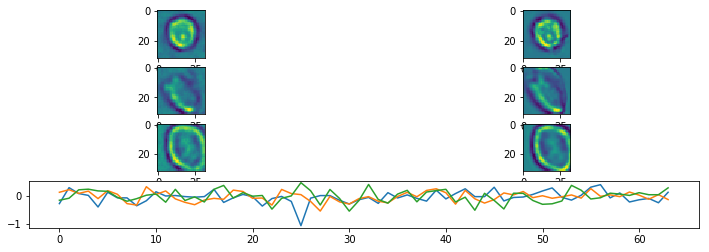

Epoch:  20 Iteration:  0 Loss:  2.60055 0.685992 0.00445175


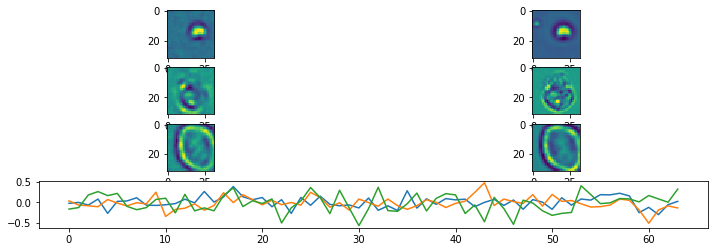

Epoch:  21 Iteration:  0 Loss:  2.41574 0.685627 0.00129589


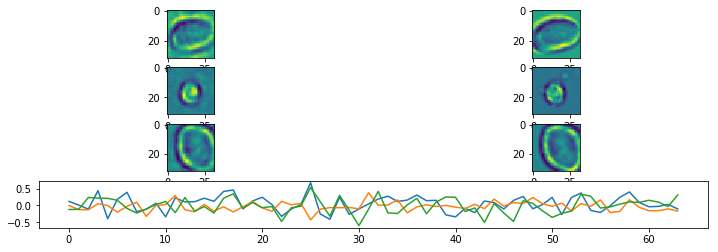

Epoch:  22 Iteration:  0 Loss:  2.40087 0.685595 0.00180393


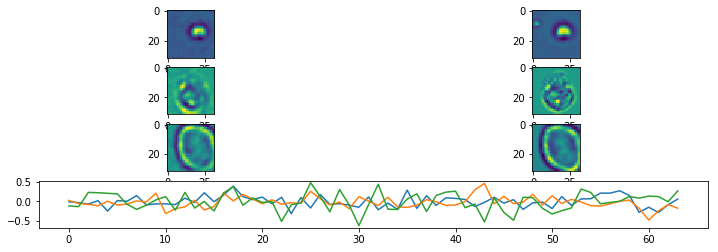

Epoch:  23 Iteration:  0 Loss:  2.38822 0.685571 0.000514537


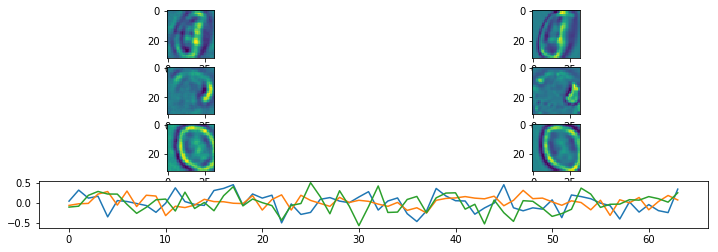

Epoch:  24 Iteration:  0 Loss:  2.34792 0.68549 0.000757813


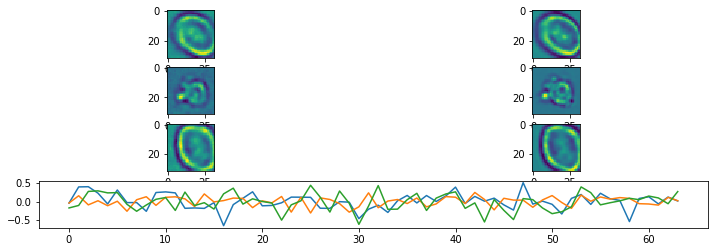

Epoch:  25 Iteration:  0 Loss:  2.32989 0.685453 0.00146517


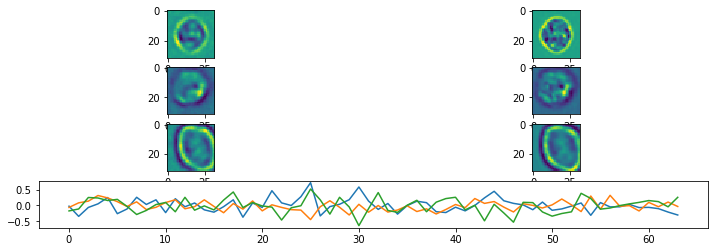

Epoch:  26 Iteration:  0 Loss:  2.37408 0.685541 0.00288013


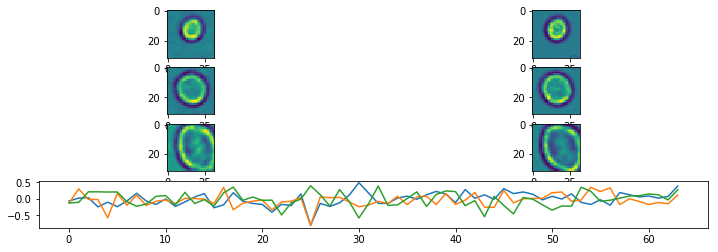

Epoch:  27 Iteration:  0 Loss:  2.31939 0.685431 0.00211179


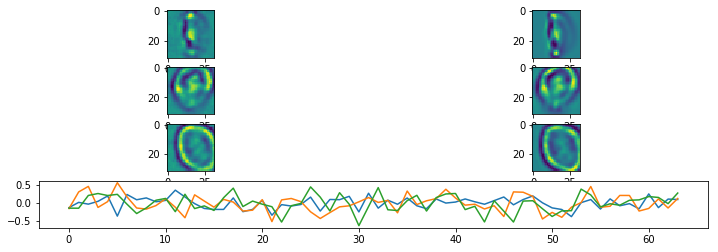

Epoch:  28 Iteration:  0 Loss:  2.33573 0.685462 0.00282684


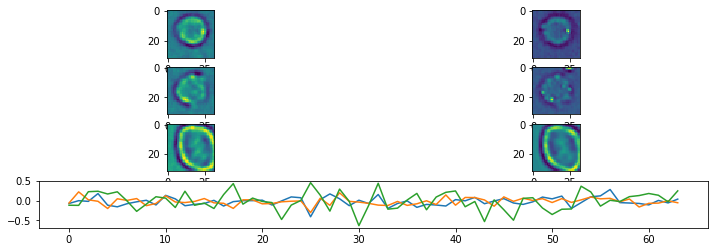

Epoch:  29 Iteration:  0 Loss:  2.26702 0.685326 0.000653625


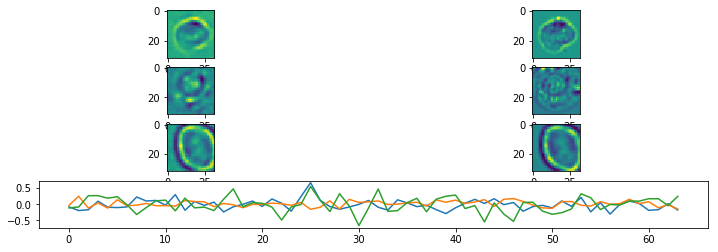

Epoch:  30 Iteration:  0 Loss:  2.30413 0.685402 0.00226042


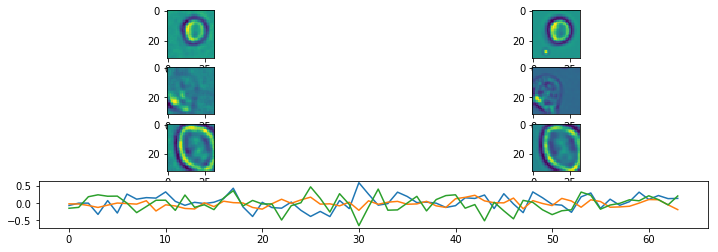

Epoch:  31 Iteration:  0 Loss:  2.2315 0.685253 0.00123712


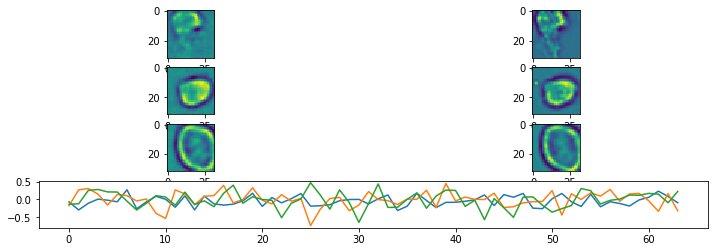

Epoch:  32 Iteration:  0 Loss:  2.24395 0.685282 0.000488549


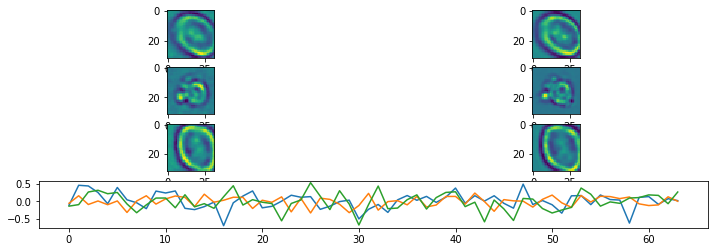

Epoch:  33 Iteration:  0 Loss:  2.23424 0.685261 0.000583321


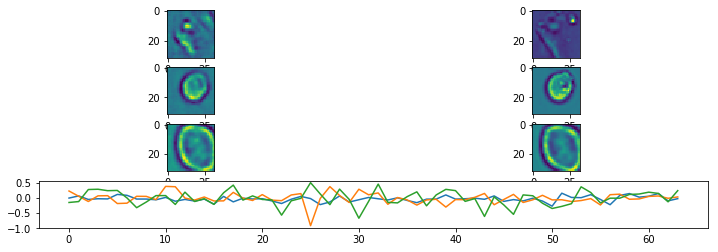

Epoch:  34 Iteration:  0 Loss:  2.22975 0.68525 0.0022516


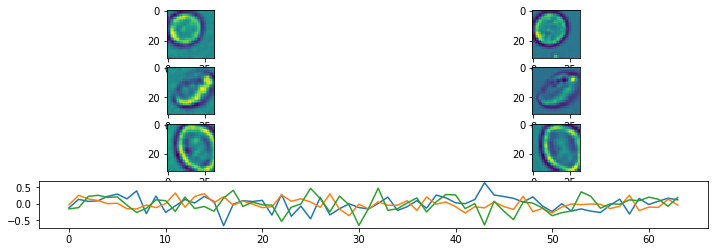

Epoch:  35 Iteration:  0 Loss:  2.23431 0.685261 0.00101984


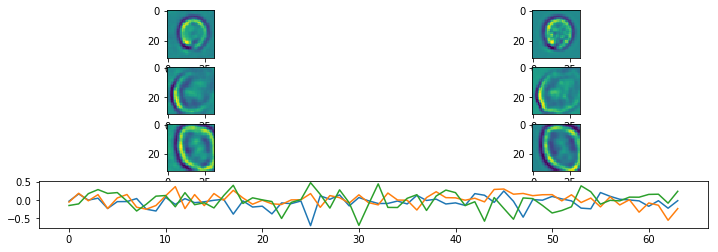

Epoch:  36 Iteration:  0 Loss:  2.19814 0.685187 0.00131467


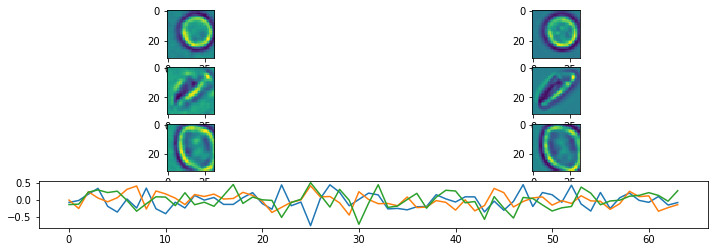

Epoch:  37 Iteration:  0 Loss:  2.18372 0.685158 0.0014596


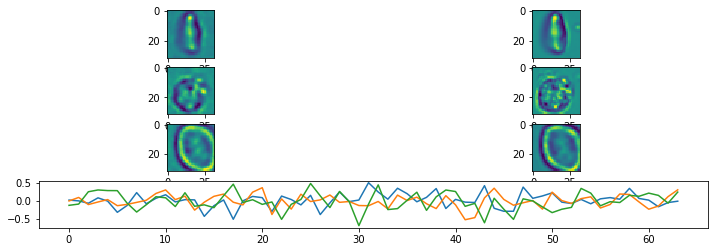

Epoch:  38 Iteration:  0 Loss:  2.18497 0.68516 0.00048849


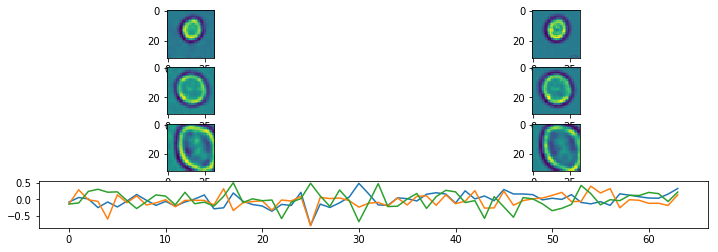

Epoch:  39 Iteration:  0 Loss:  2.20935 0.685209 0.00242102


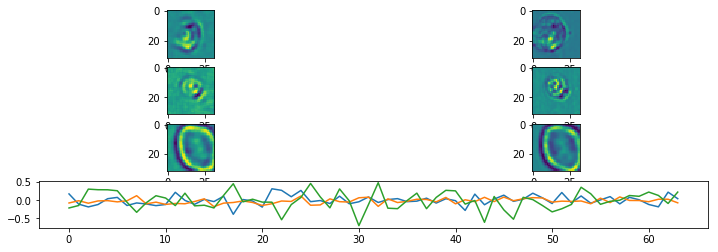

Epoch:  40 Iteration:  0 Loss:  2.15441 0.685098 0.0011304


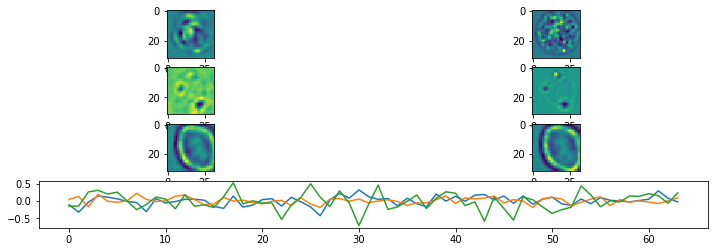

Epoch:  41 Iteration:  0 Loss:  2.14964 0.68509 0.000897914


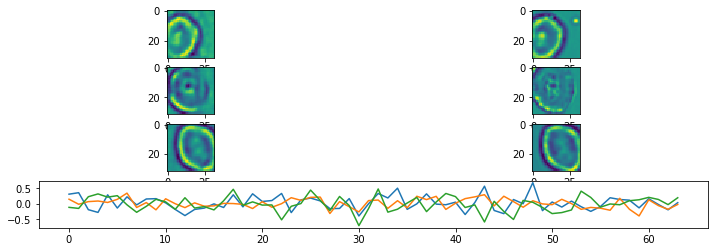

Epoch:  42 Iteration:  0 Loss:  5.47273 0.691682 0.00444171


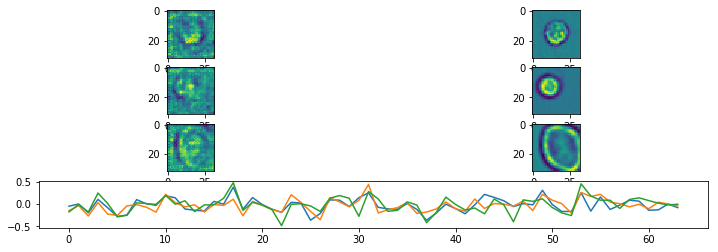

Epoch:  43 Iteration:  0 Loss:  2.72865 0.686252 0.00113195


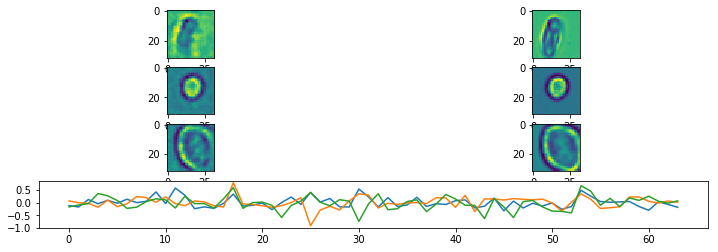

Epoch:  44 Iteration:  0 Loss:  2.51044 0.685815 0.00096789


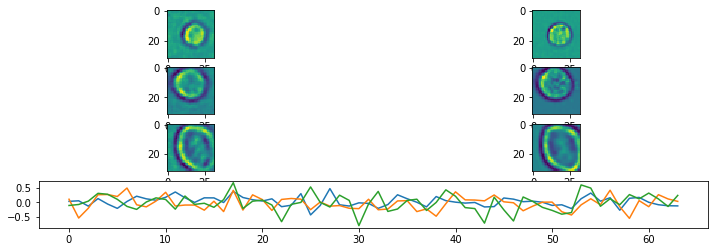

Epoch:  45 Iteration:  0 Loss:  2.41466 0.685623 0.00099656


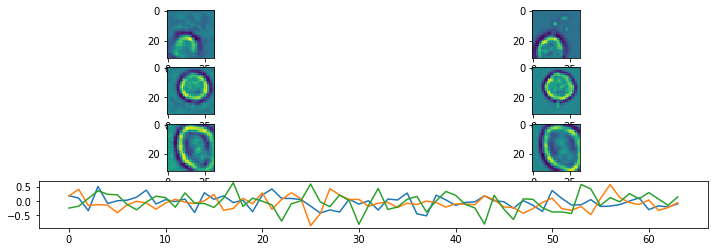

Epoch:  46 Iteration:  0 Loss:  2.34063 0.685475 0.000868261


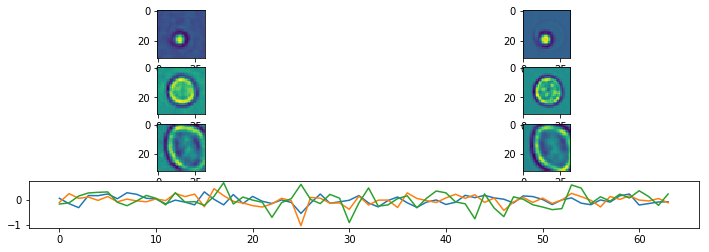

Epoch:  47 Iteration:  0 Loss:  2.30021 0.685394 0.000839323


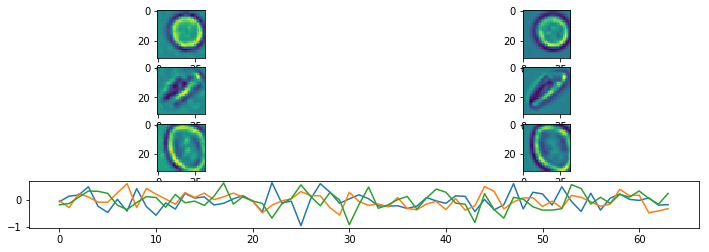

Epoch:  48 Iteration:  0 Loss:  2.26134 0.685317 0.000837445


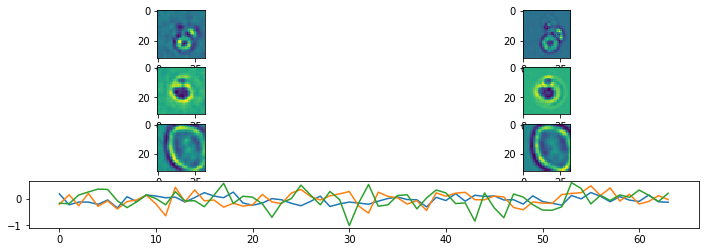

Epoch:  49 Iteration:  0 Loss:  2.24479 0.685282 0.000833899


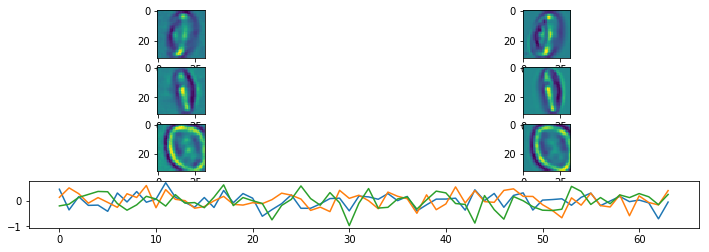

Epoch:  50 Iteration:  0 Loss:  2.22373 0.685241 0.000797659


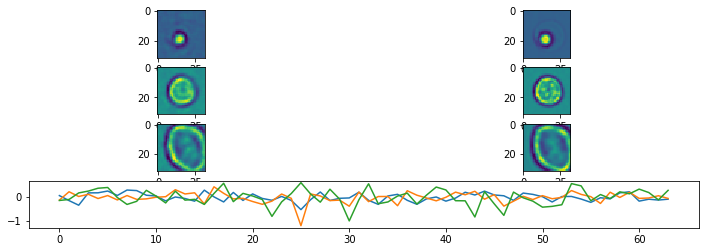

Epoch:  51 Iteration:  0 Loss:  2.20725 0.685209 0.000723958


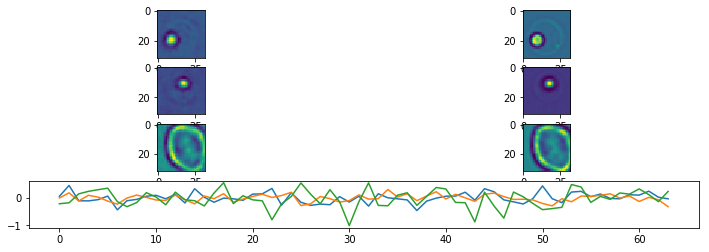

Epoch:  52 Iteration:  0 Loss:  2.1926 0.685178 0.000805348


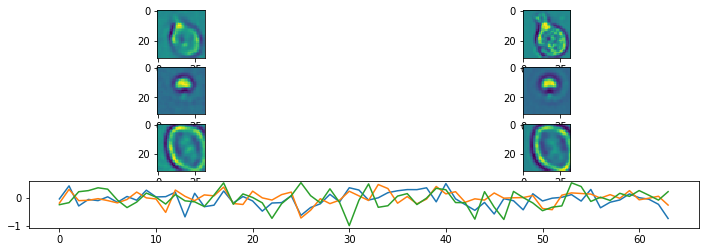

Epoch:  53 Iteration:  0 Loss:  2.17293 0.685137 0.000797242


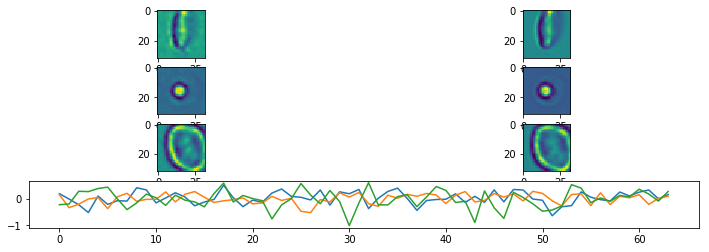

Epoch:  54 Iteration:  0 Loss:  2.16138 0.685113 0.000763893


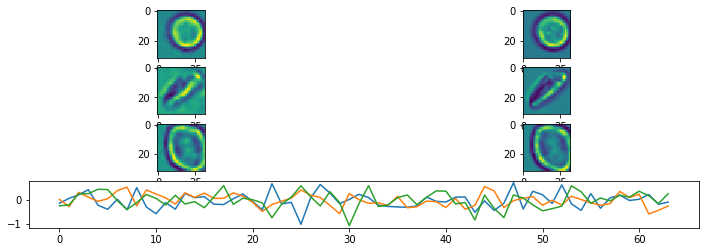

Epoch:  55 Iteration:  0 Loss:  2.15211 0.685096 0.000861049


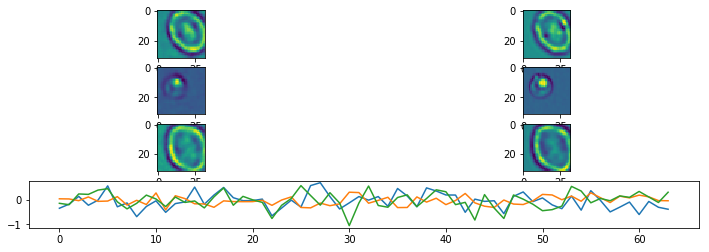

Epoch:  56 Iteration:  0 Loss:  2.15425 0.685099 0.000804156


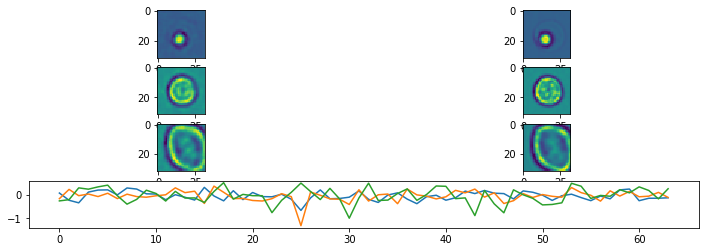

Epoch:  57 Iteration:  0 Loss:  2.14621 0.685084 0.000861168


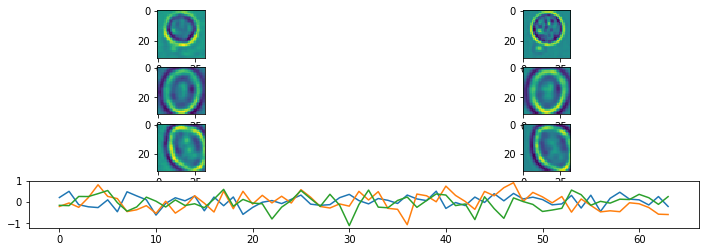

Epoch:  58 Iteration:  0 Loss:  2.1355 0.685063 0.000719577


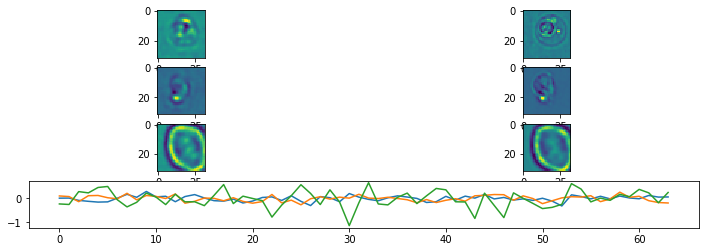

Epoch:  59 Iteration:  0 Loss:  2.12943 0.68505 0.000916243


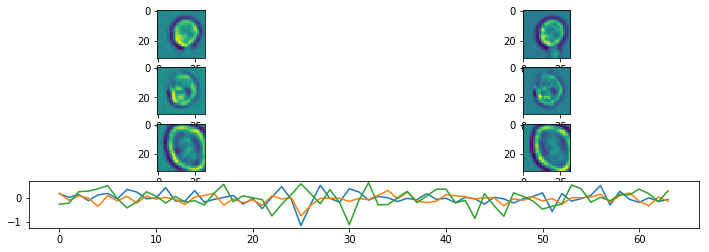

Done


In [10]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 1
p_channels = [0]
p_nepochs = 60
p_batchsize = 128
p_learning_rate = 0.0005  #.00005
p_restore = False
p_latent_size = 64 #128 + 64
p_droprate = 0.95
p_stdev = .04

enc_sizes = [(64, 3), (128, 3), (256, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

cpdir = "/media/cjw/Data/cyto/Checkpoints/Cytometry/2018-04-17-Ch0-32-mmFromTifs3/"
if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 500, cpdir)

In [7]:
x = 4
x

4